# Forecasting Walmart Sales

## Overview
This dataset contains detailed records of coffee sales from a vending machine. The vending machine is the work of a dataset author who is committed to providing an open dataset to the community. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

### Metadata

1. date	: The date from 2024-03-01 to 2024-07-26.
2. datetime	: The date from 2024-03-01 to 2024-07-26 and also contains time.
3. cash_type : Methods used by customer to pay price(card or cash).
4. card	: If card is used there card number.
5. money : Price for each coffee is paid.
6. coffee_name: Name of all coffee's.

### Import

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import datetime as dt
from datetime import timedelta, date
from datetime import datetime
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import warnings
from scipy import stats

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [77]:
df  = pd.read_csv('C:\\Users\\Faizan\\OneDrive\\Desktop\\Faizan Folder\\Excel Data\\Time Series Dataset\\index.csv')
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1055,2024-07-26,2024-07-26 13:09:56.138,card,ANON-0000-0000-0409,32.82,Latte
1056,2024-07-26,2024-07-26 17:23:29.347,card,ANON-0000-0000-0410,23.02,Americano
1057,2024-07-26,2024-07-26 17:58:29.217,card,ANON-0000-0000-0411,32.82,Cappuccino
1058,2024-07-26,2024-07-26 21:15:09.612,card,ANON-0000-0000-0009,32.82,Latte


## EDA

In [78]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [79]:
df.tail()

,date,datetime,cash_type,card,money,coffee_name
1055,2024-07-26,2024-07-26 13:09:56.138,card,ANON-0000-0000-0409,32.82,Latte
1056,2024-07-26,2024-07-26 17:23:29.347,card,ANON-0000-0000-0410,23.02,Americano
1057,2024-07-26,2024-07-26 17:58:29.217,card,ANON-0000-0000-0411,32.82,Cappuccino
1058,2024-07-26,2024-07-26 21:15:09.612,card,ANON-0000-0000-0009,32.82,Latte
1059,2024-07-26,2024-07-26 22:49:52.318,card,ANON-0000-0000-0412,27.92,Americano with Milk


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1060 non-null   object 
 1   datetime     1060 non-null   object 
 2   cash_type    1060 non-null   object 
 3   card         971 non-null    object 
 4   money        1060 non-null   float64
 5   coffee_name  1060 non-null   object 
dtypes: float64(1), object(5)
memory usage: 49.8+ KB


In [81]:
df.describe()

,money
count,1060.000000
mean,33.444453
std,4.890848
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


### Explore coffee_name Column

In [82]:
df["coffee_name"].value_counts()

coffee_name
Americano with Milk    242
Latte                  229
Cappuccino             187
Americano              162
Cortado                 92
Hot Chocolate           72
Espresso                44
Cocoa                   32
Name: count, dtype: int64

In [83]:
df["coffee_name"].nunique()

8

Text(0, 0.5, 'Names of the Coffees')

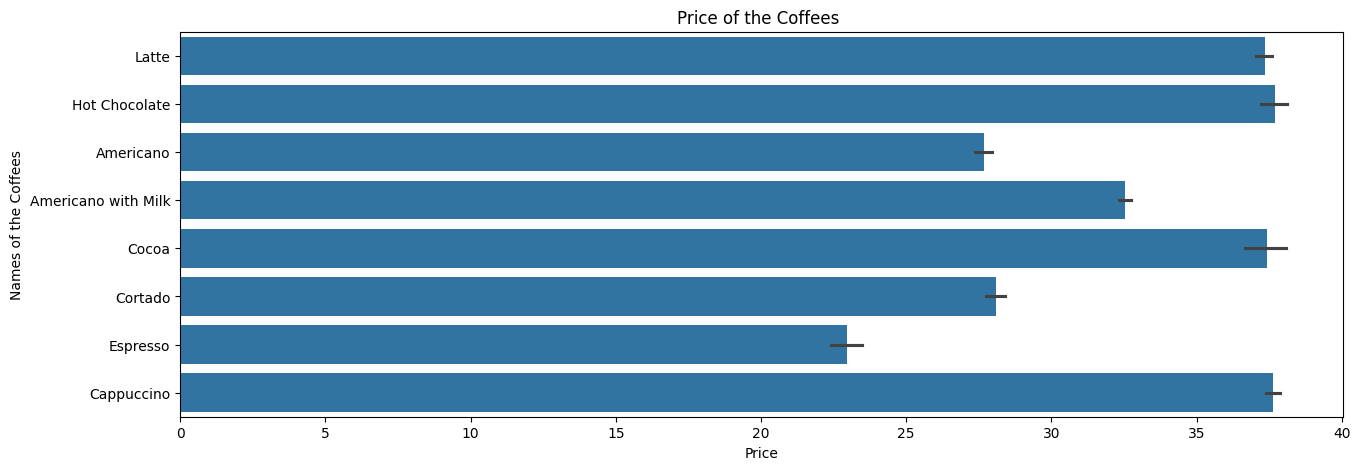

In [84]:
plt.figure(figsize=(15, 5))
sns.barplot(data= df, x='money', y='coffee_name')
plt.title('Price of the Coffees ')
plt.xlabel('Price')
plt.ylabel('Names of the Coffees')

In [85]:
fig = px.pie(df, names='coffee_name', title="Coffee's Distribution")
fig.show()

<Axes: xlabel='money', ylabel='coffee_name'>

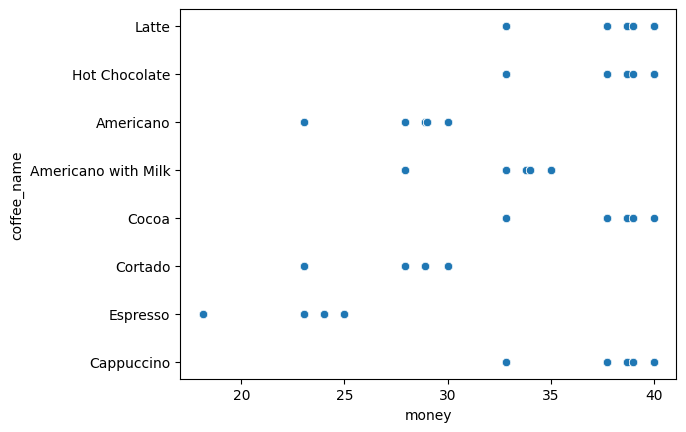

In [86]:
sns.scatterplot(data=df,x='money', y='coffee_name')

Text(0, 0.5, 'Coffee')

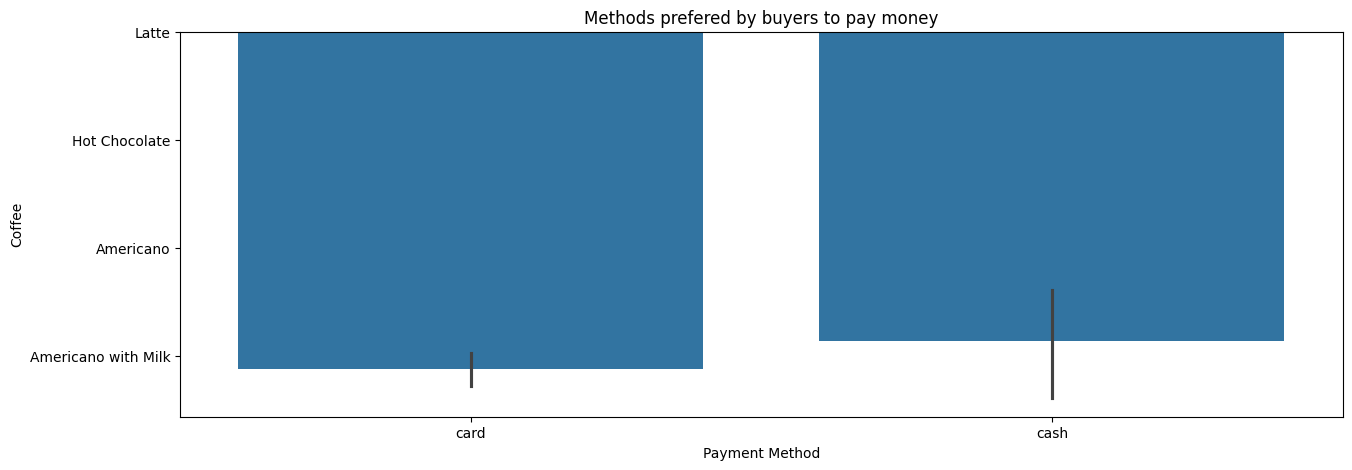

In [87]:
plt.figure(figsize=(15, 5))
sns.barplot(data= df, x='cash_type', y='coffee_name')
plt.title( 'Methods prefered by buyers to pay money')
plt.xlabel('Payment Method')
plt.ylabel('Coffee')

<Axes: xlabel='cash_type', ylabel='coffee_name'>

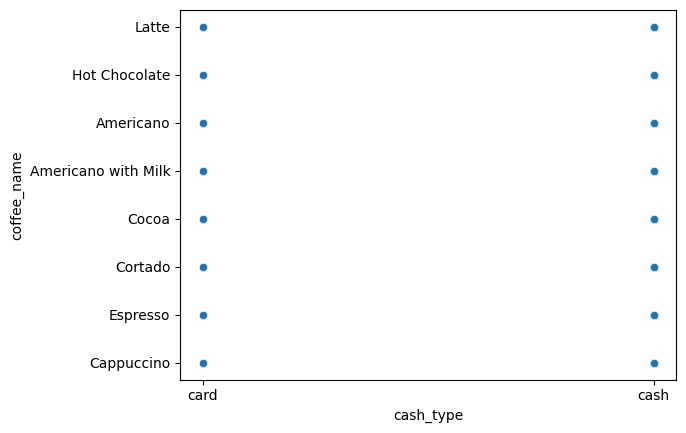

In [88]:
sns.scatterplot(data=df, x='cash_type', y='coffee_name')

### Explore money Column

In [89]:
df["money"].value_counts()

money
37.72    273
32.82    216
27.92    141
38.70    128
28.90     93
33.80     51
23.02     51
40.00     32
39.00     18
24.00     14
30.00     11
35.00      8
29.00      8
34.00      7
18.12      5
25.00      4
Name: count, dtype: int64

In [90]:
df["money"].nunique()

16

In [91]:
df["money"].min()

18.12

In [92]:
df["money"].max()

40.0

In [93]:
df.groupby('coffee_name')["money"].value_counts()

coffee_name          money
Americano            27.92     72
                     28.90     53
                     23.02     23
                     29.00      8
                     30.00      6
Americano with Milk  32.82    147
                     33.80     51
                     27.92     29
                     35.00      8
                     34.00      7
Cappuccino           37.72    116
                     38.70     39
                     32.82     17
                     40.00     10
                     39.00      5
Cocoa                37.72     14
                     38.70      9
                     32.82      5
                     39.00      3
                     40.00      1
Cortado              27.92     40
                     28.90     40
                     23.02      7
                     30.00      5
Espresso             23.02     21
                     24.00     14
                     18.12      5
                     25.00      4
Hot Chocolate        

In [94]:
df.groupby('cash_type')["money"].value_counts()

cash_type  money
card       37.72    273
           32.82    216
           27.92    141
           38.70    128
           28.90     93
           23.02     51
           33.80     51
           24.00     13
           18.12      5
cash       40.00     32
           39.00     18
           30.00     11
           29.00      8
           35.00      8
           34.00      7
           25.00      4
           24.00      1
Name: count, dtype: int64

<Axes: xlabel='coffee_name', ylabel='money'>

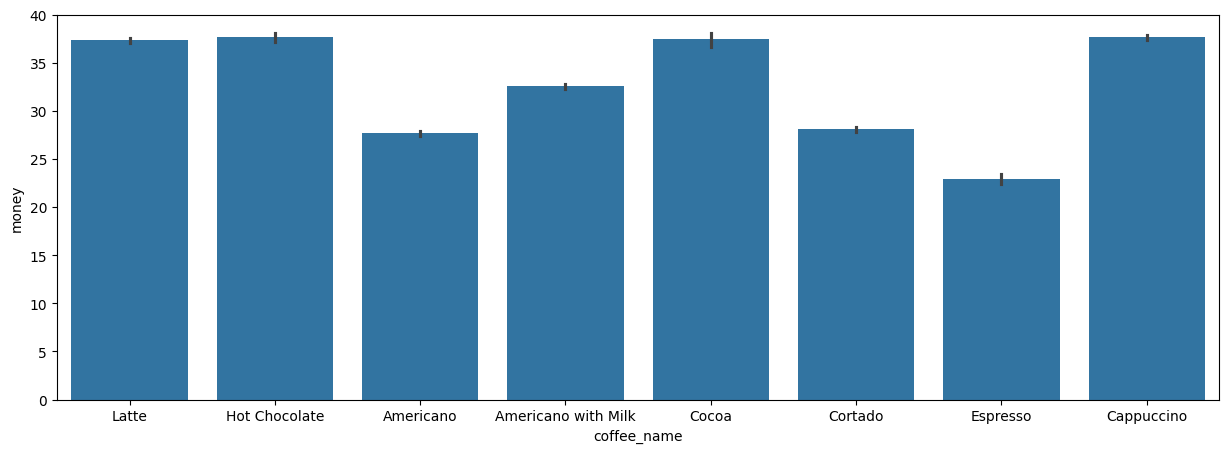

In [95]:
plt.figure(figsize=(15, 5))
sns.barplot(data= df, x='coffee_name', y='money')

<Axes: ylabel='money'>

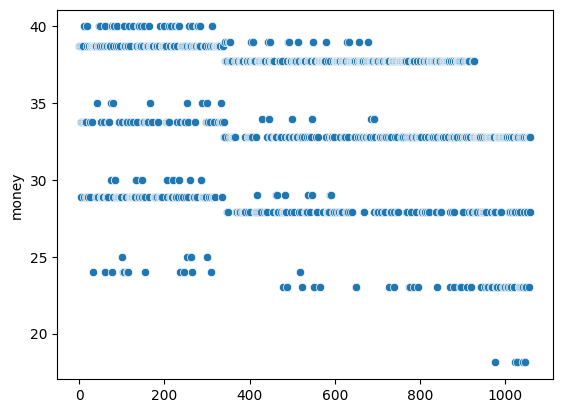

In [96]:
sns.scatterplot(df["money"])

<Axes: ylabel='money'>

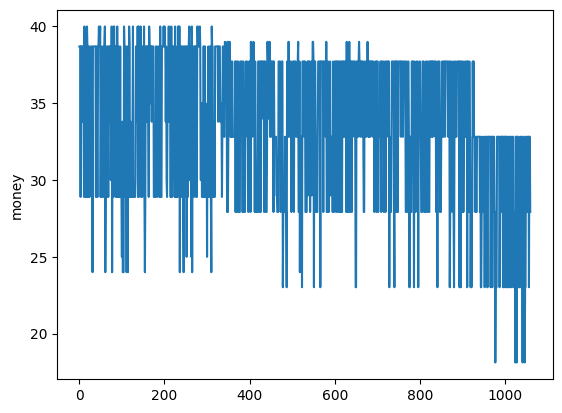

In [97]:
sns.lineplot(df["money"])

<Axes: xlabel='money', ylabel='Count'>

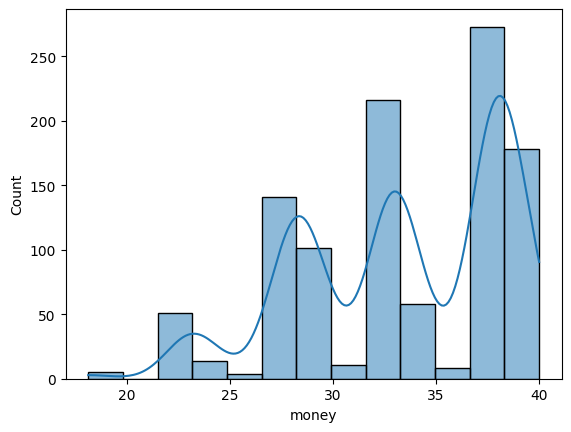

In [98]:
sns.histplot(df["money"], kde=True)

In [99]:
stats.shapiro(df["money"])

ShapiroResult(statistic=0.8915604756935929, pvalue=1.2020611651738317e-26)

<Axes: ylabel='money'>

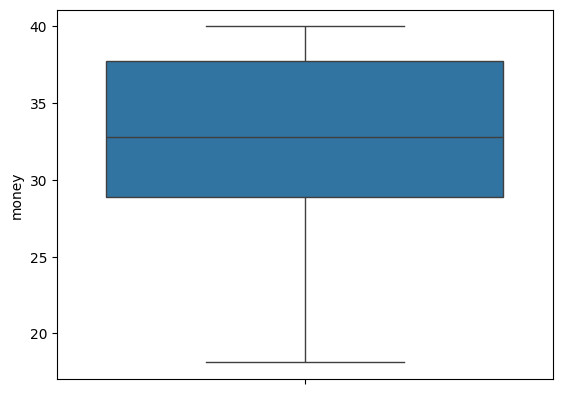

In [100]:
sns.boxplot(df["money"])

<Axes: ylabel='money'>

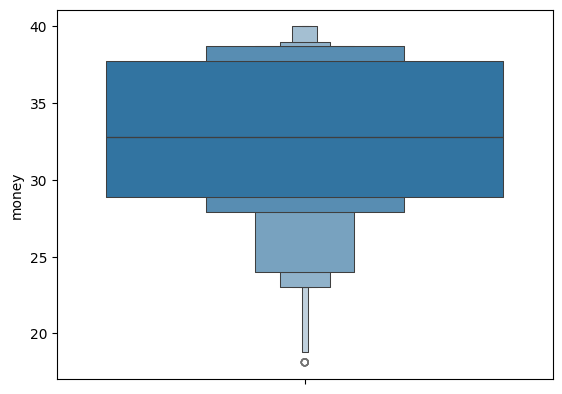

In [101]:
sns.boxenplot(df["money"])

Mean :  33.44445283018867
Median :  32.82
Mode :  37.72


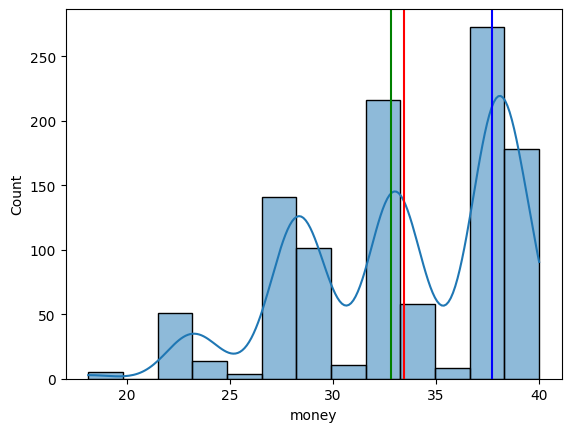

In [102]:
sns.histplot(df["money"], kde = True)
plt.axvline(df["money"].mean(), color="Red")
plt.axvline(df["money"].median(), color="Green")
plt.axvline(df["money"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["money"].mean())
print("Median : ", df["money"].median())
print("Mode : ", df["money"].mode()[0])

### Explore cash_type Column

In [103]:
df["cash_type"].nunique()

2

In [104]:
df["cash_type"].value_counts()

cash_type
card    971
cash     89
Name: count, dtype: int64

In [105]:
fig = px.pie(df, names='cash_type', title='Cash Type Distribution')
fig.show()

### Distribution of Whole Dataset

<Axes: xlabel='cash_type', ylabel='money'>

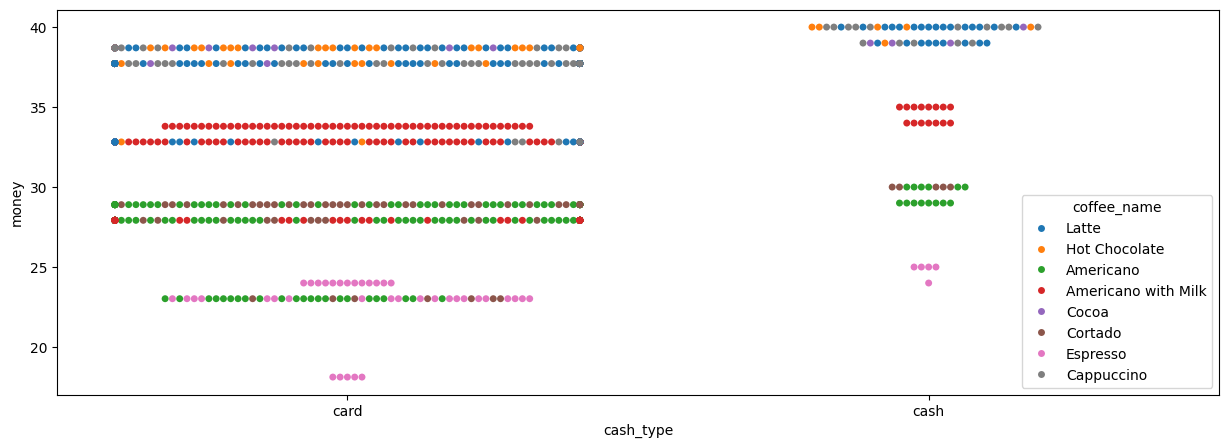

In [106]:
plt.figure(figsize=(15, 5))
sns.swarmplot(data = df, y='money', x='cash_type', hue='coffee_name' )

## Data Pre-Processing

In [107]:
df.drop(['card'], axis=1, inplace =True)  # axis=1 for columns, axis=0 for rows

In [108]:
df.drop(['datetime'], axis=1, inplace =True)  # axis=1 for columns, axis=0 for rows

In [109]:
df.head()

,date,cash_type,money,coffee_name
0,2024-03-01,card,38.7,Latte
1,2024-03-01,card,38.7,Hot Chocolate
2,2024-03-01,card,38.7,Hot Chocolate
3,2024-03-01,card,28.9,Americano
4,2024-03-01,card,38.7,Latte


In [110]:
bins = [18,25,30,35,40]
labels = ['18-25','25-30','30-35','35-40']

## Adding a New Column to Dataset
df["Money Distribution"] =pd.cut(df["money"],bins=bins, labels=labels)
df.head()

,date,cash_type,money,coffee_name,Money Distribution
0,2024-03-01,card,38.7,Latte,35-40
1,2024-03-01,card,38.7,Hot Chocolate,35-40
2,2024-03-01,card,38.7,Hot Chocolate,35-40
3,2024-03-01,card,28.9,Americano,25-30
4,2024-03-01,card,38.7,Latte,35-40


In [111]:
df['Money Distribution'].nunique()

4

In [112]:
df['Money Distribution'].value_counts()

Money Distribution
35-40    451
30-35    282
25-30    253
18-25     74
Name: count, dtype: int64

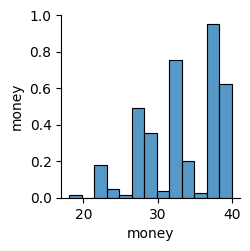

In [113]:
sns.pairplot(df)

In [114]:
from sklearn.preprocessing import LabelEncoder
le_edl = LabelEncoder()
df['cash_type'] = le_edl.fit_transform(df['cash_type'])

le_gen = LabelEncoder()
df['coffee_name'] = le_gen.fit_transform(df['coffee_name'])
df.head()

,date,cash_type,money,coffee_name,Money Distribution
0,2024-03-01,0,38.7,7,35-40
1,2024-03-01,0,38.7,6,35-40
2,2024-03-01,0,38.7,6,35-40
3,2024-03-01,0,28.9,0,25-30
4,2024-03-01,0,38.7,7,35-40


## Forecasting

In [115]:
df.set_index('date', inplace=True)

In [116]:
df.head()

,cash_type,money,coffee_name,Money Distribution
date,,,,
2024-03-01,0,38.7,7,35-40
2024-03-01,0,38.7,6,35-40
2024-03-01,0,38.7,6,35-40
2024-03-01,0,28.9,0,25-30
2024-03-01,0,38.7,7,35-40


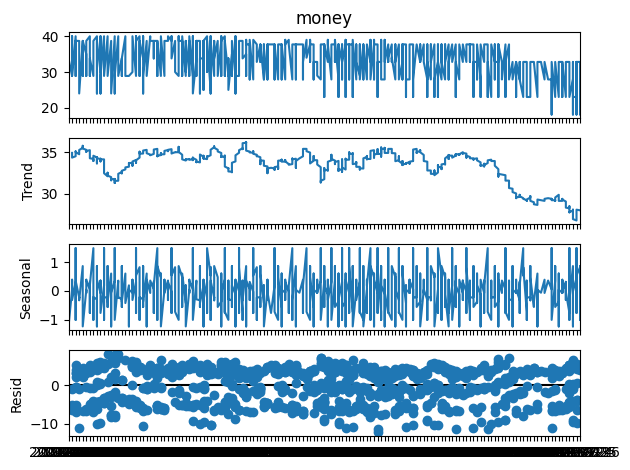

In [117]:
# Decompose the time series
decompose = seasonal_decompose(df['money'], model='additive', period=30)

# Plot the decomposed components
decompose.plot()
plt.show()

In [118]:

import plotly.graph_objs as go

# Decompose the time series
decompose = seasonal_decompose(df['money'], model='multiplicative', period=12)

# Plot the decomposed components
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=decompose.trend, mode='lines', name='Trend'))
fig.add_trace(go.Scatter(x=df.index, y=decompose.seasonal, mode='lines', name='Seasonal'))
fig.add_trace(go.Scatter(x=df.index, y=decompose.resid, mode='lines', name='Residual'))
fig.show()

In [119]:
def adf_test(df):
    result = adfuller(df)
    print(f'ADF Statistics : {result[0]}')
    print(f'p-value : {result[1]} ')
    if result[1]<= 0.05:
        print('Reject Null Hypothesis, Data is Stationary. We can use ARIMA Model')
    else:
        print('Fail to Reject Null Hypothesis, Data is not Stationarity. We cannot use ARIMA Model')
adf_test(df['money'])

ADF Statistics : -3.206937274819428
p-value : 0.019586617875910355 
Reject Null Hypothesis, Data is Stationary. We can use ARIMA Model


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

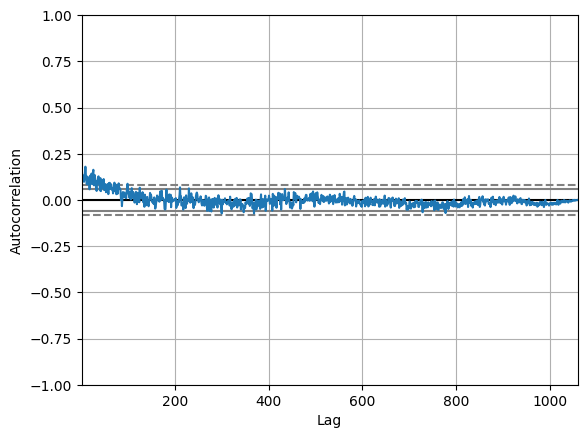

In [120]:
pd.plotting.autocorrelation_plot(df['money'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

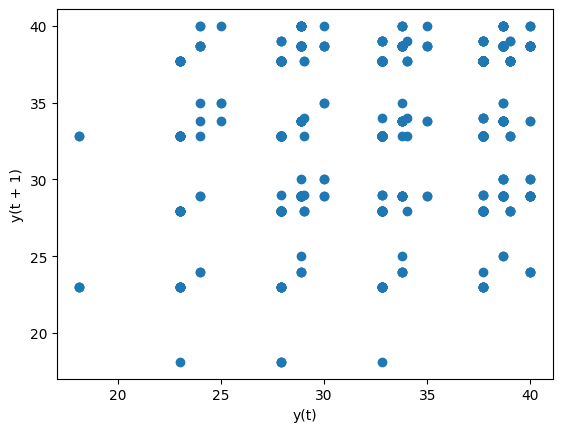

In [121]:
pd.plotting.lag_plot(df['money'])

### Find d-value

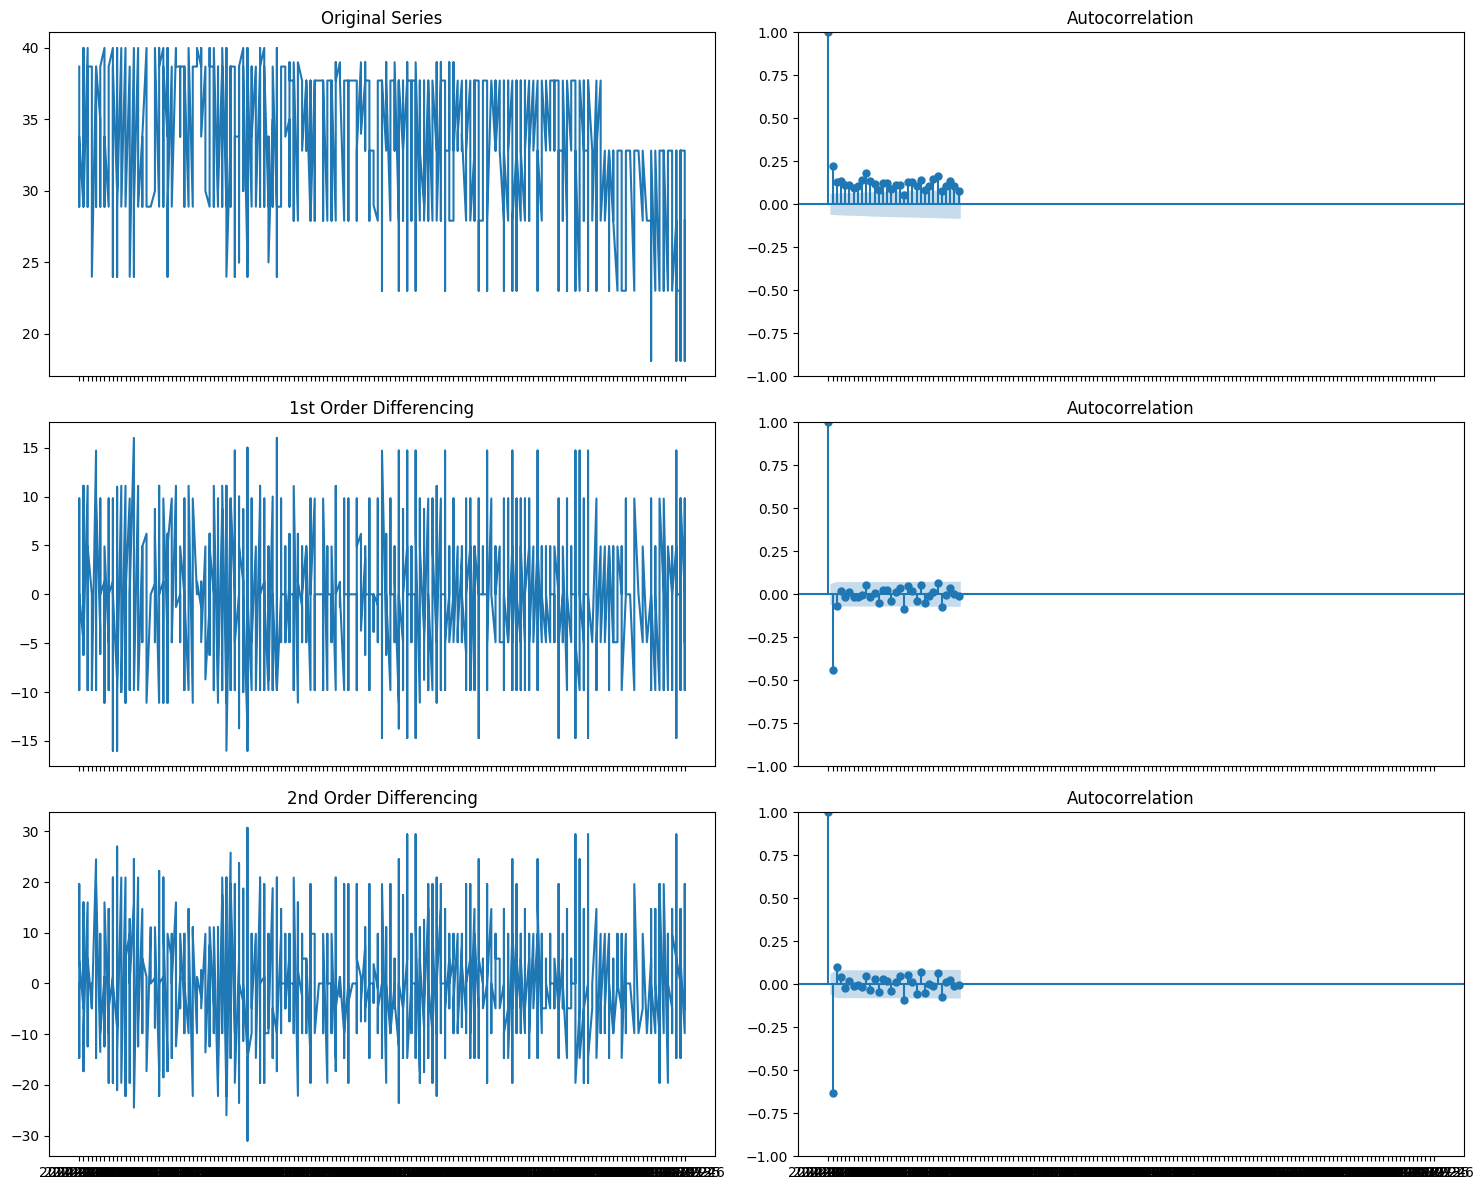

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)

# Original Series
axes[0, 0].plot(df['money'])
axes[0, 0].set_title('Original Series')
plot_acf(df['money'], ax=axes[0, 1])

# First Differencing
first_diff = df['money'].diff().dropna()
axes[1, 0].plot(first_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])

# Second Differencing
second_diff = first_diff.diff().dropna()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()


d = 1

### Find p-value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

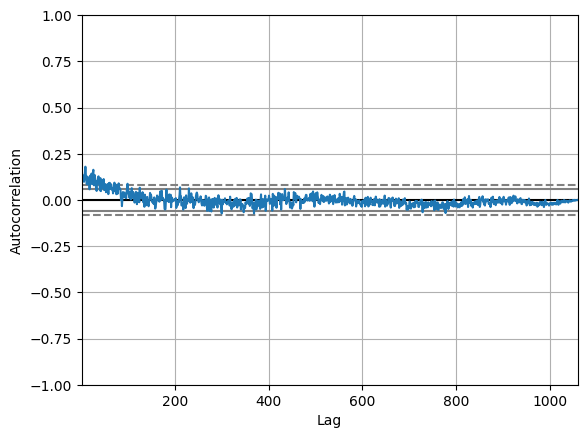

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['money'])

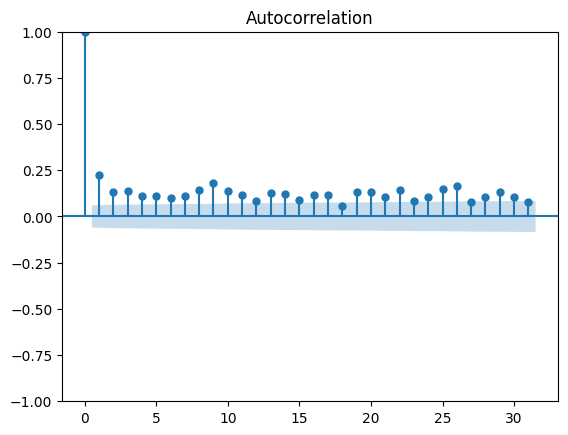

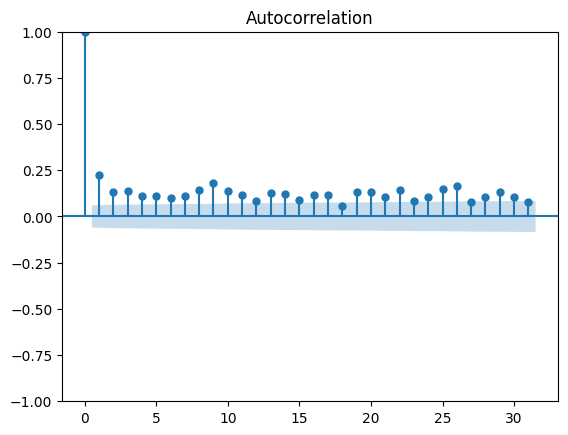

In [124]:
plot_acf(df['money'], alpha=0.05)

In [125]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['money']))
print(x_acf)

           0
0   1.000000
1   0.225617
2   0.130150
3   0.135945
4   0.111459
5   0.112700
6   0.097799
7   0.109339
8   0.142476
9   0.179814
10  0.135418
11  0.117315
12  0.085134
13  0.126174
14  0.124255
15  0.088015
16  0.113630
17  0.114616
18  0.057189
19  0.130190
20  0.132335
21  0.106342
22  0.142083
23  0.085624
24  0.105292
25  0.147593
26  0.163056
27  0.079363
28  0.105349
29  0.134393
30  0.107663


p = 1

### Find q value

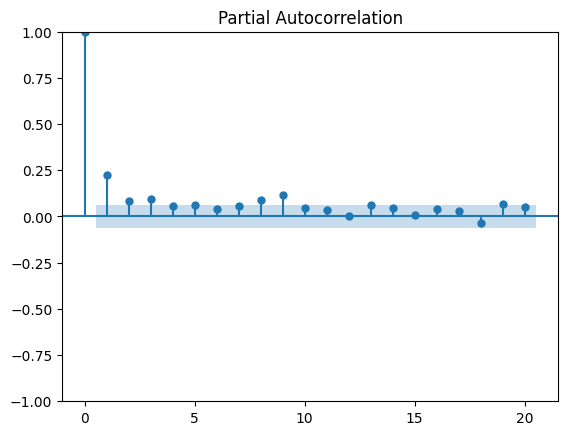

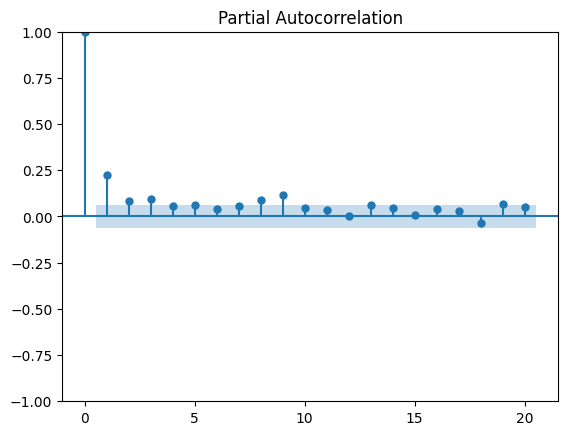

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['money'],  lags=20, alpha=0.05)

q = 1

In [127]:
q = 1
p = 1
d = 1

### SARIMAX fitting

In [128]:
import statsmodels.api as sm
import warnings

In [129]:
p,d, q = 2,1,2
model =sm.tsa.statespace.SARIMAX(df['money'],
                                  order=(p,d,q), 
                                  seasonal_order=(p,d,q, 12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              money   No. Observations:                 1060
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -3111.503
Date:                            Wed, 31 Jul 2024   AIC                           6241.007
Time:                                    05:54:59   BIC                           6285.590
Sample:                                         0   HQIC                          6257.914
                                           - 1060                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7149      0.511     -1.399      0.162      -1.716       0.286
ar.L2          0.0781      0.079   

In [131]:
predictions = model_fit.predict(start=len(df['money']), end=len(df['money'])+200)
print(predictions)

1060    27.783093
1061    28.392486
1062    28.318090
1063    27.307661
1064    27.843018
          ...    
1256    26.547648
1257    27.461587
1258    27.216107
1259    26.461669
1260    27.407941
Name: predicted_mean, Length: 201, dtype: float64


In [132]:
df.head()

,cash_type,money,coffee_name,Money Distribution
date,,,,
2024-03-01,0,38.7,7,35-40
2024-03-01,0,38.7,6,35-40
2024-03-01,0,38.7,6,35-40
2024-03-01,0,28.9,0,25-30
2024-03-01,0,38.7,7,35-40


## Inverse Encoding

In [133]:
# Create a mask for non-NaN values
mask = df['cash_type'].notna()

# Apply inverse_transform only to non-NaN values
df.loc[mask, 'cash_type'] = le_edl.inverse_transform(df.loc[mask, 'cash_type'].astype(int))

print(df)

           cash_type  money  coffee_name Money Distribution
date                                                       
2024-03-01      card  38.70            7              35-40
2024-03-01      card  38.70            6              35-40
2024-03-01      card  38.70            6              35-40
2024-03-01      card  28.90            0              25-30
2024-03-01      card  38.70            7              35-40
...              ...    ...          ...                ...
2024-07-26      card  32.82            7              30-35
2024-07-26      card  23.02            0              18-25
2024-07-26      card  32.82            2              30-35
2024-07-26      card  32.82            7              30-35
2024-07-26      card  27.92            1              25-30

[1060 rows x 4 columns]


In [134]:
# Create a mask for non-NaN values
mask = df['coffee_name'].notna()

# Apply inverse_transform only to non-NaN values
df.loc[mask, 'coffee_name'] = le_gen.inverse_transform(df.loc[mask, 'coffee_name'].astype(int))

print(df)

           cash_type  money          coffee_name Money Distribution
date                                                               
2024-03-01      card  38.70                Latte              35-40
2024-03-01      card  38.70        Hot Chocolate              35-40
2024-03-01      card  38.70        Hot Chocolate              35-40
2024-03-01      card  28.90            Americano              25-30
2024-03-01      card  38.70                Latte              35-40
...              ...    ...                  ...                ...
2024-07-26      card  32.82                Latte              30-35
2024-07-26      card  23.02            Americano              18-25
2024-07-26      card  32.82           Cappuccino              30-35
2024-07-26      card  32.82                Latte              30-35
2024-07-26      card  27.92  Americano with Milk              25-30

[1060 rows x 4 columns]


In [135]:
df.head()

,cash_type,money,coffee_name,Money Distribution
date,,,,
2024-03-01,card,38.7,Latte,35-40
2024-03-01,card,38.7,Hot Chocolate,35-40
2024-03-01,card,38.7,Hot Chocolate,35-40
2024-03-01,card,28.9,Americano,25-30
2024-03-01,card,38.7,Latte,35-40
